In [7]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

In [8]:
df = pd.read_csv('../data/AQAG_correct_incorrect_testing-combined.csv')[['id','question_score_gpt_vaibhav', 'question_score_gpt_yahan',
                                                                         'question_score_gpt_wes', 'correct_answer_gpt_score_vaibhav', 
                                                                         'correct_answer_score_gpt_yahan', 'correct_answer_score_gpt_wes',
                                                                         'correct_answer_score_vicuna_vaibhav', 'correct_answer_score_vicuna_yahan',
                                                                         'correct_answer_score_vicuna_wes', 'incorrect_answer_score_gpt_vaibhav',
                                                                         'incorrect_answer_score_gpt_yahan', 'incorrect_answer_score_gpt_wes']]
for column in df.columns[1:]:
    df[column] = df[column].astype(str)

df = df[df['correct_answer_gpt_score_vaibhav'].str.isnumeric()]

for column in df.columns[1:]:
    df[column] = df[column].astype(float)

In [9]:
print(cohen_kappa_score(df['question_score_gpt_vaibhav'].astype(int), df['question_score_gpt_wes']))
print(cohen_kappa_score(df['correct_answer_gpt_score_vaibhav'].astype(int), df['correct_answer_score_gpt_wes']))
print(cohen_kappa_score(df['correct_answer_score_vicuna_vaibhav'].astype(int), df['correct_answer_score_vicuna_wes']))
print(cohen_kappa_score(df['incorrect_answer_score_gpt_vaibhav'].astype(int), df['incorrect_answer_score_gpt_wes']))

0.6460176991150443
nan
0.6477987421383649
0.6585365853658536


/home/jovyan/conda_envs/WesleyEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:673: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [10]:
cohen_kappa_score(df['correct_answer_gpt_score_vaibhav'].astype(int), df['correct_answer_score_gpt_wes'])

/home/jovyan/conda_envs/WesleyEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:673: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


nan

In [11]:
cohen_kappa_score(df['correct_answer_score_vicuna_vaibhav'].astype(int), df['correct_answer_score_vicuna_wes'])

0.6477987421383649

In [12]:
from statistics import mode

def getFinalScore(row, col1, col2, col3):
    if row[col1] == row[col2]:
        return row[col1]
    
    # elif row[col1] == row[col3]:
    #     return row[col3]
    # elif row[col2] == row[col3]:
    #     return row[col3]
    else:
        print(row['id'])
        print(row[col1], row[col2], row[col3])
        return mode([row[col1], row[col2], row[col3]])
        #return (int(row[col1]) + int(row[col2]))/2

df['question_score_final'] = df.apply(lambda row: getFinalScore(row, 'question_score_gpt_wes', 'question_score_gpt_vaibhav', 'question_score_gpt_yahan'), axis=1)
df['correct_answer_score_gpt_final'] = df.apply(lambda row: getFinalScore(row, 'correct_answer_score_gpt_wes','correct_answer_gpt_score_vaibhav', 'correct_answer_score_gpt_yahan'), axis=1)
df['correct_answer_score_vicuna_final'] = df.apply(lambda row: getFinalScore(row, 'correct_answer_score_vicuna_wes', 'correct_answer_score_vicuna_vaibhav', 'correct_answer_score_vicuna_yahan'), axis = 1)
df['incorrect_answers_score_gpt_final'] = df.apply(lambda row: getFinalScore(row, 'incorrect_answer_score_gpt_wes','incorrect_answer_score_gpt_vaibhav', 'incorrect_answer_score_gpt_yahan'), axis=1)

118-summarization
1.0 2.0 2.0
165-inference
1.0 2.0 1.0
192-inference
1.0 2.0 1.0
208-summarization
1.0 2.0 2.0
209-recall
1.0 2.0 2.0
256-inference
2.0 1.0 1.0
284-summarization
1.0 2.0 2.0
433-summarization
1.0 2.0 2.0
499-inference
1.0 2.0 2.0
90-summarization
1.0 2.0 2.0
159-recall
0.0 1.0 1.0
453-recall
1.0 0.0 1.0
159-recall
0.0 1.0 1.0


In [13]:
df[df['id']=='436-recall']

,id,question_score_gpt_vaibhav,question_score_gpt_yahan,question_score_gpt_wes,correct_answer_gpt_score_vaibhav,correct_answer_score_gpt_yahan,correct_answer_score_gpt_wes,correct_answer_score_vicuna_vaibhav,correct_answer_score_vicuna_yahan,correct_answer_score_vicuna_wes,incorrect_answer_score_gpt_vaibhav,incorrect_answer_score_gpt_yahan,incorrect_answer_score_gpt_wes,question_score_final,correct_answer_score_gpt_final,correct_answer_score_vicuna_final,incorrect_answers_score_gpt_final
49,436-recall,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0


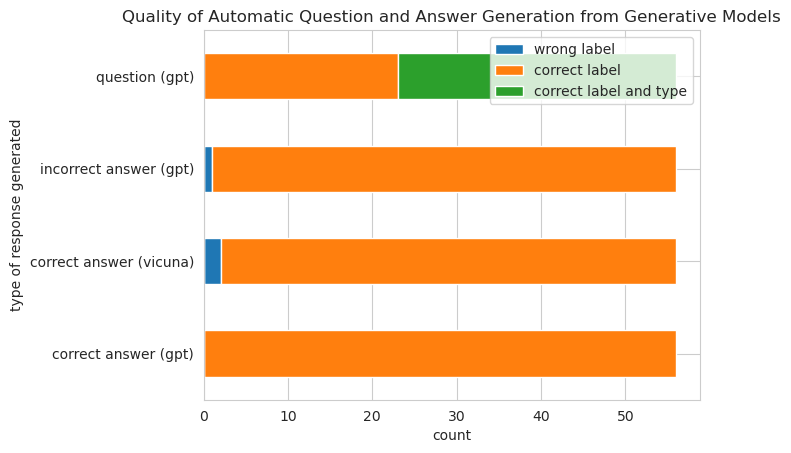

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


viz_df = df[['id', 'question_score_final', 'correct_answer_score_gpt_final', 
             'correct_answer_score_vicuna_final', 'incorrect_answers_score_gpt_final']]
viz_df.columns = ['id', 'question (gpt)', 'correct answer (gpt)', 
              'correct answer (vicuna)', 'incorrect answer (gpt)']

viz_df = pd.melt(viz_df,
                 id_vars='id',
                 value_vars=['question (gpt)', 'correct answer (gpt)','correct answer (vicuna)', 'incorrect answer (gpt)'],
                 var_name='result', value_name='quality', col_level=None, ignore_index=True)

viz_df['quality'] = viz_df['quality'].astype(float)

df_plot = viz_df.groupby(['quality', 'result']).size().reset_index().pivot(columns='quality', index='result', values=0)
df_plot.plot(kind='barh', stacked=True)
plt.xlabel('count')
plt.ylabel('type of response generated')
plt.title('Quality of Automatic Question and Answer Generation from Generative Models')
plt.legend(['wrong label','correct label','correct label and type'])